# Default land/ocean mask

When crunching data with NetCDF-SCM, we want to cut files into (at least) Northern/Southern Hemisphere, land/ocean boxes. However, we don't always have access to land-surface fraction information from the raw model output. In these cases, we simply apply a default land/ocean mask instead. In this notebook, we show how this mask looks and how it works.

## Imports


In [1]:
import iris
import numpy as np

In [2]:
from matplotlib import pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt

## Default mask

Our default mask lives in `netcdf_scm.masks`. We can access it using `netcdf_scm.masks.get_default_sftlf_cube`.

In [3]:
from netcdf_scm.weights import get_default_sftlf_cube

In [4]:
default_sftlf = get_default_sftlf_cube()

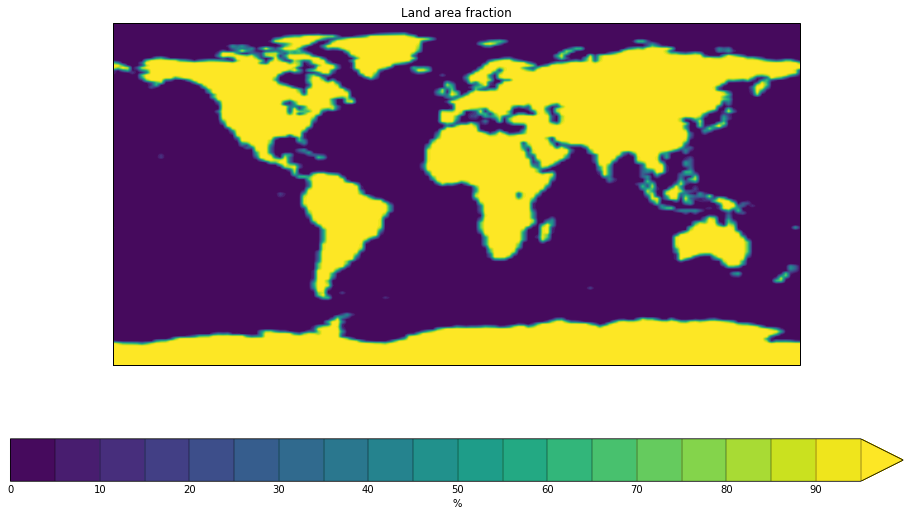

In [5]:
fig = plt.figure(figsize=(16, 9))
qplt.contourf(
    default_sftlf,
    levels=np.arange(0, 100, 5), 
    extend='max',
);

In [6]:
zoomed = default_sftlf.extract(
    iris.Constraint(latitude=lambda cell: -45 < cell < -25)
    & iris.Constraint(longitude=lambda cell: 120 < cell < 160)
)

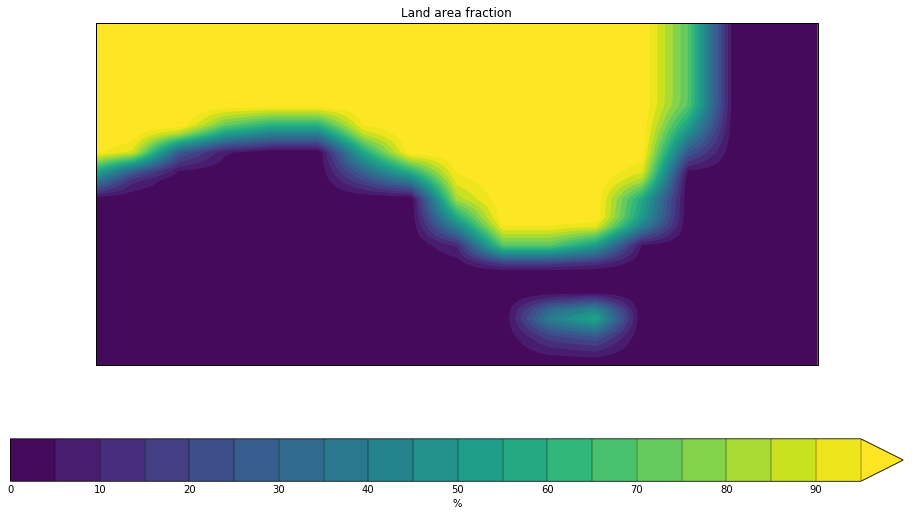

In [7]:
fig = plt.figure(figsize=(16, 9))
qplt.contourf(
    zoomed,
    levels=np.arange(0, 100, 5), 
    extend='max',
);